In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


import os
for dirname, _, filenames in os.walk('/kaggle/input'): #get path of .csv file
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/receipt/receipt.csv


In [2]:
data = pd.read_csv("/kaggle/input/receipt/receipt.csv")

# 問題1.縣市銷售金額排名

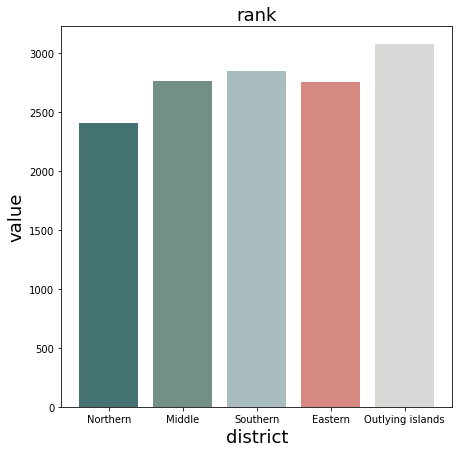

,排名,縣市,縣市銷售金額平均排名值
0,1,臺北市,1505.88
1,2,臺中市,1913.95
2,3,嘉義市,2007.44
3,4,桃園市,2062.71
4,5,新竹市,2089.08
5,6,臺南市,2437.53
6,7,新北市,2501.55
7,8,高雄市,2575.64
8,9,花蓮縣,2638.31
9,10,新竹縣,2808.95


In [3]:
#縣市銷售金額排名
cities = pd.read_csv("/kaggle/input/receipt/receipt.csv",index_col="縣市")
city = data['縣市'].unique()                                             #取出所有不同的縣市
count = 0
rank = []
for i in range(len(city)):
    rank.append(i+1) #rank = [1,2,...,10]
s = []
for i in city:
    temp = cities.loc[i]['銷售金額排名值'].mean()                         #算出各縣市銷售金額排名值的平均
    s.append(round(temp,2))                                             #存到list
s,city = zip(*sorted(zip(s,city)))                                      #依據各縣市平均(s)sort
df = pd.DataFrame({'排名': rank, '縣市': city, '縣市銷售金額平均排名值': s}) #存進DataFrame
df.columns = ['排名','縣市', '縣市銷售金額平均排名值']                       #column name

#北中南東離島 銷售金額平均排名值 長條圖
avg = pd.DataFrame(s,city)
avg.columns = ['avg']
north = ["新北市","臺北市","基隆市","桃園市","新竹縣","新竹市","宜蘭縣"]
middle = ["苗栗縣","臺中市","南投縣","彰化縣"]
south = ["雲林縣","嘉義市","嘉義縣","臺南市","高雄市","屏東縣"]
east = ["花蓮縣","臺東縣"]
other = ["金門縣","澎湖縣","連江縣"]
x = ["Northern", "Middle", "Southern", "Eastern", "Outlying islands"]
y = []
n = w = m = e = s = o = 0 
for i in north: n += avg.loc[i]['avg'].mean()                          #算出北區縣市排名平均排名值的平均
y.append(n/len(north))
for i in middle: m += avg.loc[i]['avg'].mean()                         #算出中區縣市排名平均排名值的平均
y.append(m/len(middle))
for i in south: s += avg.loc[i]['avg'].mean()                          #算出南區縣市排名平均排名值的平均
y.append(s/len(south))
for i in east: e += avg.loc[i]['avg'].mean()                           #算出東區縣市排名平均排名值的平均
y.append(e/len(east))
for i in other: o += avg.loc[i]['avg'].mean()                          #算出離島縣市排名平均排名值的平均
y.append(o/len(other))

#draw
ran = np.arange(len(x))
plt.figure(figsize=(7, 7))
plt.bar(ran, y, color=['#457373', '#739086', '#AABDBE', '#D58981', '#D8D8D6'])
plt.xticks(ran, x)
plt.xlabel('district', fontsize = 18)
plt.ylabel('value', fontsize = 18)
plt.title('rank', fontsize = 18)
plt.show()                                                             #長條圖愈長，排名愈後
df                                                                     #print df


# 問題2.發票張數排名值 & 銷售金額排名值正相關

相關係數:  0.923 (越靠近1則越相關)



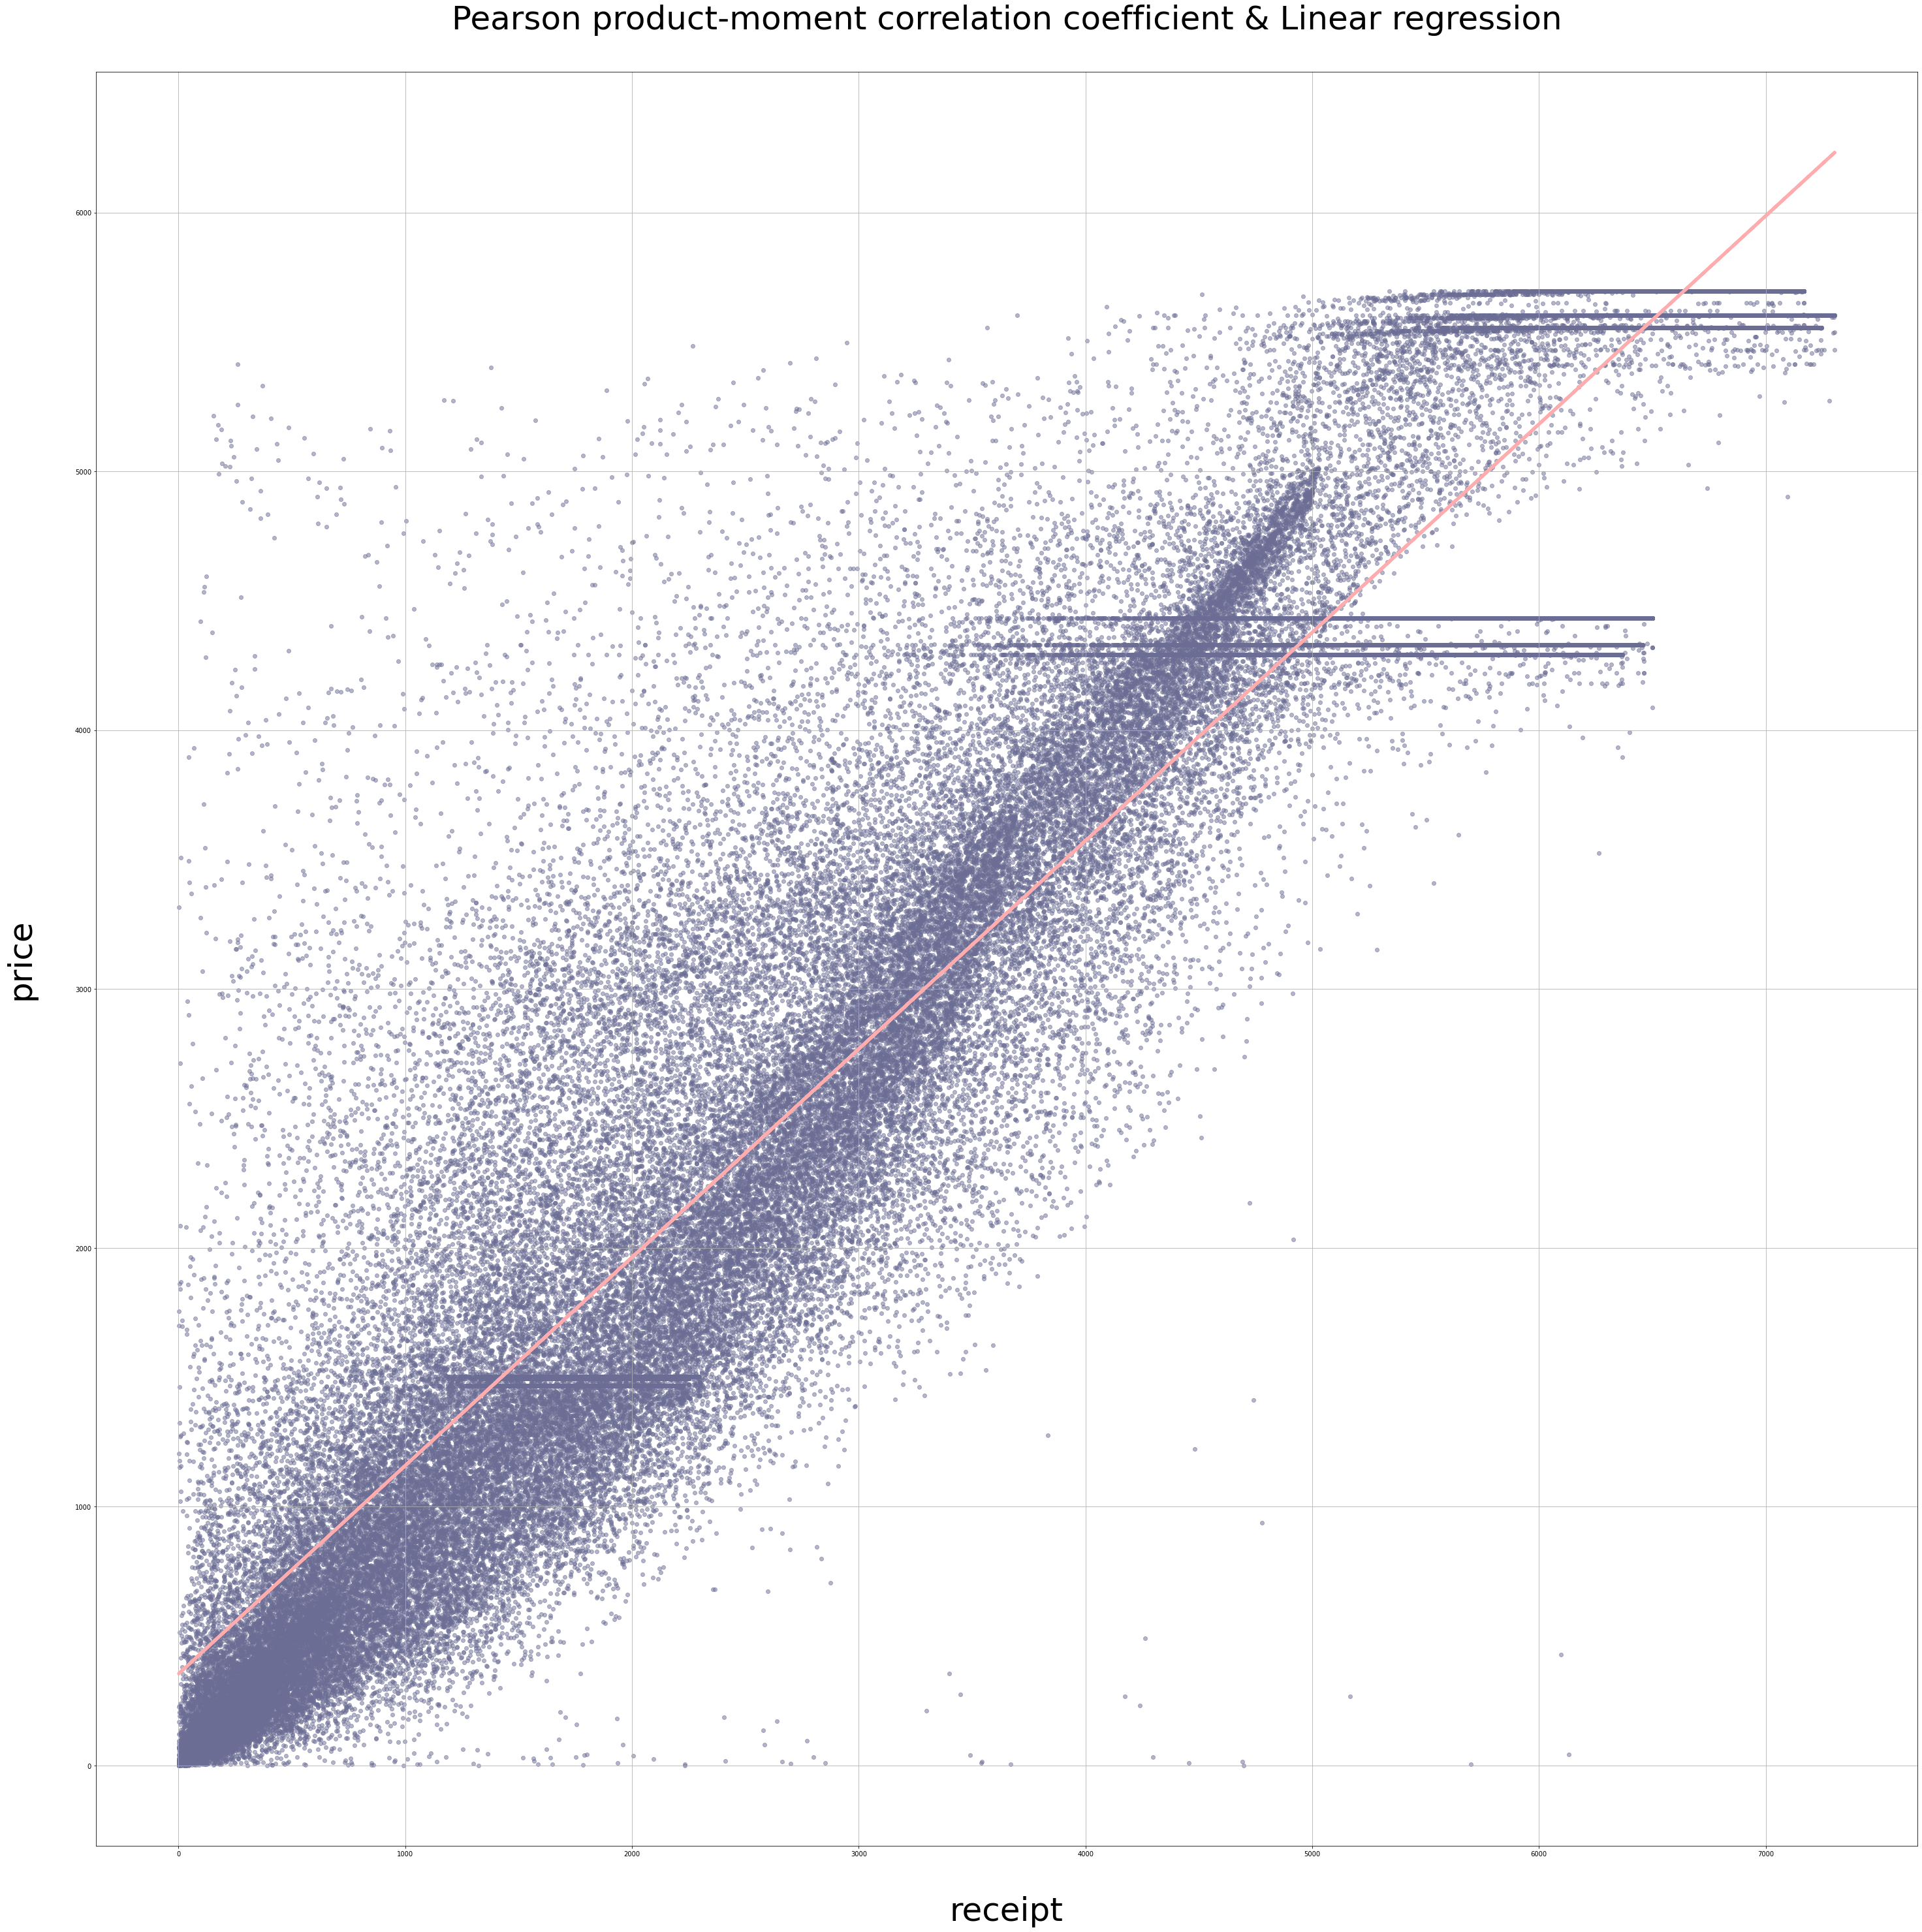

In [4]:
#calculate Pearson product-moment correlation coefficient
receipt = data['發票張數排名值']
price = data['銷售金額排名值'] 
s1 = pd.Series(receipt)                                      #轉為Series類型, for ccor
s2 = pd.Series(price) 
corr = s1.corr(s2)                                           #計算皮爾森積動差相關係數 Pearson product-moment correlation coefficient
print("相關係數: ", round(corr,3),"(越靠近1則越相關)\n")         #print corr

#for Linear regression
model = LinearRegression()
x = np.array(receipt)                                        #use numpy
y = np.array(price)
x = x[:,np.newaxis] 
model = LinearRegression()                                   #model training
model.fit(x, y)
yfit = model.predict(x)

#draw
plt.figure(figsize=(50, 50))
plt.grid(True)                                               #網格
plt.title('Pearson product-moment correlation coefficient & Linear regression\n', fontsize = 50)
plt.xlabel("\nreceipt", fontsize = 50)
plt.ylabel("price\n", fontsize = 50)
plt.scatter(receipt, price, color = "#6b6d94", alpha = 0.5) #receipt&對應的price
plt.plot(x, yfit, linewidth = 5, color = "#FFACAF")         #迴歸直線
plt.show()